In [47]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
from itertools import chain
from scipy.optimize import curve_fit

In [48]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\SSRP_analysis_branch\\NetResponseChange_postInduction\\' # set dir - on my computer
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Avilable Files to choose from: {len(d)}')
print(f'Files on hand: {d}')
##############################################
FileN_contrl = d[1] #  data   
FileN_expt = d[3] #  data  

file_path1 = os.path.join(MainDir, FileN_contrl) # join paths and prep 2 load
file_path2 = os.path.join(MainDir, FileN_expt) # join paths and prep 2 load

print( 'Group Imported:', FileN_contrl.split('_')[3], FileN_contrl.split('_')[4], FileN_contrl.split('_')[5])
print( 'Group Imported:', FileN_expt.split('_')[3], FileN_expt.split('_')[4],FileN_expt.split('_')[5])

load_ctrl_Data = pkl.load(open(file_path1, 'rb'))
load_expt_Data = pkl.load(open(file_path2, 'rb'))
print('Keys Avilable:', load_ctrl_Data.keys())

Avilable Files to choose from: 4
Files on hand: ['Subject_ANOVA_DF_CntrlGroup_RCA1_2F_20240628_140258.mat', 'Subject_ANOVA_DF_CntrlGroup_RCA1_2F_20240628_140258.pkl', 'Subject_ANOVA_DF_ExptGroup_RCA1_2F_20240628_140356.mat', 'Subject_ANOVA_DF_ExptGroup_RCA1_2F_20240628_140356.pkl']
Group Imported: CntrlGroup RCA1 2F
Group Imported: ExptGroup RCA1 2F
Keys Avilable: dict_keys(['NetResponseChange', 'STD_ResponseChange'])


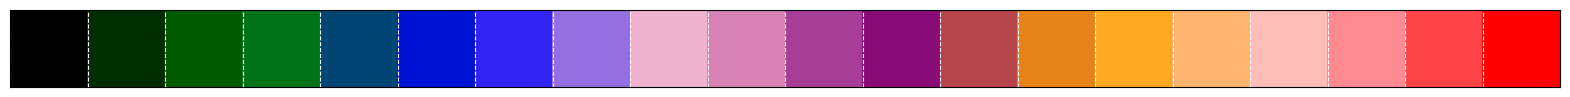

In [60]:
# Define the base colors for blending
base_colors = ['black','green', 'blue', 'pink' ,'purple', 'orange', 'pink','red']
# Number of colors needed in the spectrum
num_colors = 20
fill = sns.blend_palette(base_colors, n_colors=num_colors, as_cmap=False)
sns.palplot(fill)
plt.show()
color_set = [0,2,5,7,12,14]

contrast_labs = ['1%','3%','5%','16%','40%','100%']

custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

In [50]:
cntrl_data = load_ctrl_Data['NetResponseChange']
expt_data = load_expt_Data['NetResponseChange']

cntrl_std = load_ctrl_Data['STD_ResponseChange']
expt_std  = load_expt_Data['STD_ResponseChange']

In [51]:
print(cntrl_data.keys())

print(cntrl_data[0])

dict_keys([0, 1, 2, 3])
[nan nan nan nan nan nan]


In [65]:
all_responses = np.zeros((6,6))
all_responses[0,:] = cntrl_data[2]
all_responses[1,:] = cntrl_data[3]
for iters in range(4):
    all_responses[iters+2] = expt_data[iters]

In [66]:
all_standDevs = np.zeros((6,6))

all_standDevs[0,:] = cntrl_std[2]
all_standDevs[1,:] = cntrl_std[3]
for iters in range(4):
    all_standDevs[iters+2] = expt_std[iters]

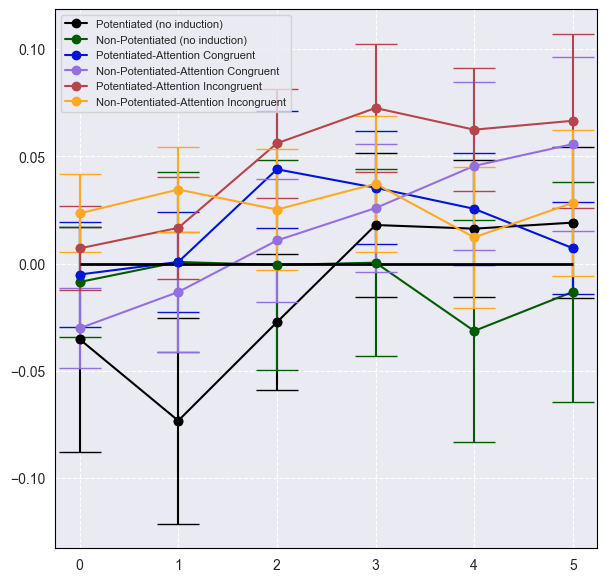

In [70]:
all_response_labels = ['Potentiated (no induction)','Non-Potentiated (no induction)','Potentiated-Attention Congruent','Non-Potentiated-Attention Congruent','Potentiated-Attention Incongruent','Non-Potentiated-Attention Incongruent']

fig,axs = plt.subplots(figsize = (7,7))
for cx in range(all_responses.shape[0]):
    axs.plot(np.arange(0,6,1),all_responses[cx,:],label = all_response_labels[cx], color = fill[color_set[cx]],marker = 'o')
    axs.errorbar(np.arange(0,6,1),all_responses[cx,:], yerr = all_standDevs[cx,:], fmt = 'o',color = fill[color_set[cx]], barsabove= False , capsize=15)
axs.legend(loc = 'upper left', fontsize = 8)
axs.hlines(0, xmin = 0, xmax = 5, color = 'black', linewidth = 2)
